# MIE1622 Computational Finance and Risk Management

## Assignment 4 - Asset Pricing

### Bowen Xu 1006411786

##### Import Libraries

In [1]:
from scipy.stats import norm
import numpy as np
import math
import matplotlib.pyplot as plt

##### Initialize all constants

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

##### Define functions

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    # --------- Insert your code here --------- #
    t = 0
    d1 = (np.log(S0/K) + (r + (sigma**2)/2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2 = d1 - sigma * (np.sqrt(T-t))
    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * (np.exp(-r * (T-t)))
    p = norm.cdf(-d2) * K * (np.exp(-r * (T-t))) - norm.cdf(-d1) * S0
    
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps+1,numPaths))
    dT = T / numSteps
    #paths[0,:] = S0
    paths[0] = [S0]*numPaths
    
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep+1,iPath] = paths[iStep,iPath]*np.exp((mu-0.5*sigma**2)*dT + sigma * np.sqrt(dT)*np.random.normal(0,1))
    
    callpayoffT = np.zeros((numPaths,1))
    putpayoffT = np.zeros((numPaths,1))

    for iPath in range(numPaths):
        callpayoffT[iPath] = np.maximum(paths[numSteps,iPath]-K,0)*np.exp(-r*T)
        putpayoffT[iPath] = np.maximum(K - paths[numSteps,iPath],0)*np.exp(-r*T)
      
    c = np.mean(callpayoffT)
    p = np.mean(putpayoffT)
    
    return c, p, paths

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    # --------- Insert your code here --------- #
    paths = np.zeros((numSteps+1,numPaths))
    dT = T / numSteps
    paths[0] = [S0]*numPaths
    
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep+1,iPath] = paths[iStep,iPath]*np.exp((mu-0.5*sigma**2)*dT + sigma * np.sqrt(dT)*np.random.normal(0,1))

    callpayoffT = np.zeros((numPaths,1))
    putpayoffT = np.zeros((numPaths,1))
    temp = np.zeros((numPaths,1))
    
    for iPath in range(numPaths):
        temp[iPath] = np.sum(paths[:,iPath] >= Sb)
        if temp[iPath] > 0:
            callpayoffT[iPath] = np.maximum(paths[numSteps,iPath]-K,0)*np.exp(-r*T)
            putpayoffT[iPath] = np.maximum(K - paths[numSteps,iPath],0)*np.exp(-r*T)
        else:
            callpayoffT[iPath] = 0
            putpayoffT[iPath] = 0
            
    c = np.mean(callpayoffT)
    p = np.mean(putpayoffT)
    
    return c, p

##### Results

In [4]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 12
numPaths = 100000

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, MC_one_paths = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, MC_multi_paths = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.021161679838384
One-step MC price of an European put option is 7.910408136550294
Multi-step MC price of an European call option is 8.005833765213106
Multi-step MC price of an European put option is 7.927409826477211
One-step MC price of an Barrier call option is 7.7247867315338645
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.968439582622466
Multi-step MC price of an Barrier put option is 1.2565304704398108


##### One-Step Monte Carlo Simulation

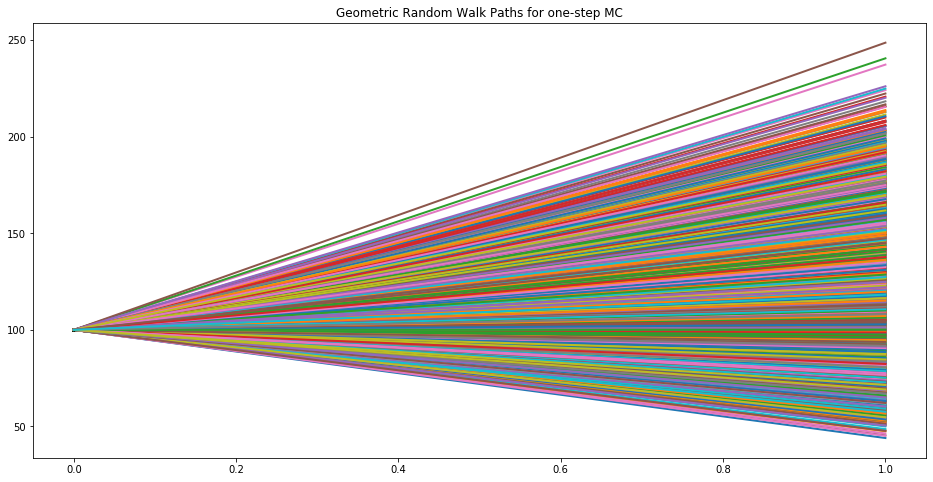

In [14]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize = (16,8))
[plt.plot(MC_one_paths[:,i], linewidth=2) for i in range(numPaths)]
plt.title('Geometric Random Walk Paths for one-step MC')
plt.show()

##### Multi-Step Monte Carlo Simulation

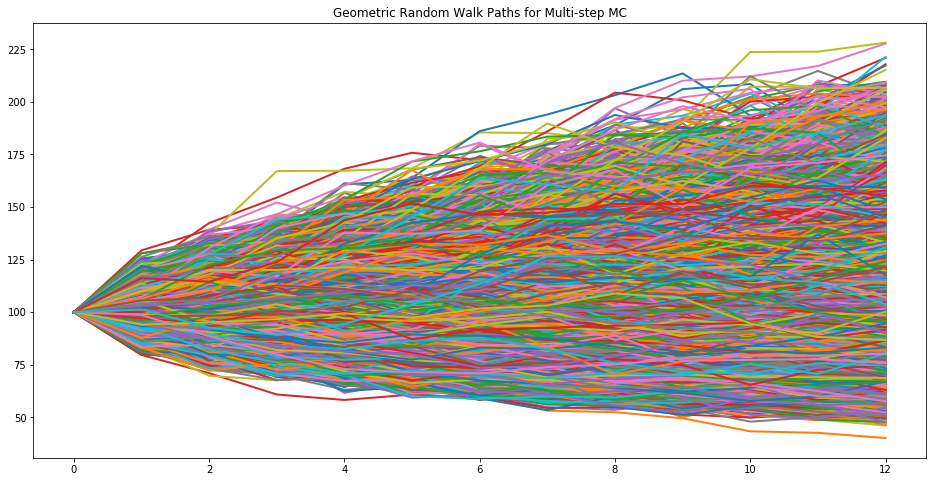

In [5]:
# Plot results
# --------- Insert your code here --------- #
plt.figure(figsize = (16,8))
[plt.plot(MC_multi_paths[:,i], linewidth=2) for i in range(numPaths)]
plt.title('Geometric Random Walk Paths for Multi-step MC')
plt.show()

##### Volatility increased and decreased by 10%

In [6]:
# one-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10%
callMC_Barrier_Knockin_Price_1_stepin, putMC_Barrier_Knockin_Price_1_stepin = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility increased by 10%
callMC_Barrier_Knockin_Price_multi_stepin, putMC_Barrier_Knockin_Price_multi_stepin = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)

# one-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10%
callMC_Barrier_Knockin_Price_1_stepde, putMC_Barrier_Knockin_Price_1_stepde = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)

# multi-step Monte Carlo pricing procedure for Barrier option with volatility decreased by 10%
callMC_Barrier_Knockin_Price_multi_stepde, putMC_Barrier_Knockin_Price_multi_stepde = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)

print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepin)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepin)) 
print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepin)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepin)) 
print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_stepde)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_stepde)) 
print('Multi-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_stepde)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_stepde))



One-step MC price of an Barrier call option with volatility increased by 10% is 8.649151914404912
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.829760016266032
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.5989681933583286
One-step MC price of an Barrier call option with volatility decreased by 10% is 6.988921453514773
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0
Multi-step MC price of an Barrier call option with volatility decreased by 10% is 7.163141392898287
Multi-step MC price of an Barrier put option with volatility decreased by 10% is 0.9648571411569482


##### Find the Optimal Number of Scenarios

In [10]:
paths_list = [10, 100, 1000, 5000, 10000, 1000000, 10000000, 100000000]
call_BS_European_Price, put_BS_European_Price = BS_european_price(S0, K, T, r, sigma)
residual_call_optimal, residual_put_optimal = 0.01, 0.01

for num_path in paths_list:
    callMC_optimal_step, putMC_optimal_step, MC_optimal_paths = MC_european_price(S0, K, T, r, mu, sigma, 1, num_path)
    
    call_residual = abs(callMC_optimal_step - call_BS_European_Price)
    if call_residual < residual_call_optimal:
        residual_call_optimal = call_residual
        num_path_call_optimal = num_path
        callMC_optimal = callMC_optimal_step
        
    
    put_residual = abs(putMC_optimal_step - put_BS_European_Price)
    if put_residual < residual_put_optimal:
        residual_put_optimal = put_residual
        num_path_put_optimal = num_path
        putMC_optimal = putMC_optimal_step

In [11]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(put_BS_European_Price))
print('Optimal MC price of an European call option is ' + str(callMC_optimal)) 
print('Optimal MC price of an European put option is ' + str(putMC_optimal)) 

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
Optimal MC price of an European call option is 8.020167595105244
Optimal MC price of an European put option is 7.900455556204604


In [12]:
print('Optimal Number of Path is ' + str(num_path_call_optimal)) 

Optimal Number of Path is 100000000
